# Assignment 1: Predicting Employee Attrition with Random Forests

Execute cells **top to bottom**. Where you see `# TODO`, add your code.

**Data:** `data/IBM_HR_Employee_Attrition.csv`

**Deliverables produced in this file:**
- Baseline Decision Tree metrics (accuracy, precision, recall)
- Random Forest metrics + side-by-side comparison table
- Feature importance visualization
- Markdown sections for **Key Drivers of Attrition** and **Reflection**

### Download Dependencies
Run this cell once to install all dependencies. These can also be run directly in the terminal if you prefer.


In [16]:
pip install pandas numpy matplotlib seaborn scikit-learn

In [17]:
print("Importing required libraries...")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

print("✓ All libraries imported successfully!\n")

Importing required libraries...
✓ All libraries imported successfully!



### Step 1: Load the dataset
----------------------------------------------------------------------------
Confirm the CSV can be read and preview the first rows. The following code should output the first 5 rows of the IBM HR data.

In [18]:
# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
print("Loading employee attrition dataset...")
df = pd.read_csv('./data/IBM_HR_Employee_Attrition.csv')
print("✓ Dataset loaded successfully!\n")

# Display first few rows to verify load
print("First 5 rows of the dataset:")
print(df.head())

# Display basic info about the dataset
print("\nDataset Information:")
print(df.info())

print("\n" + "="*80)
print("CHECKPOINT: Verify that the dataset loaded correctly and you can see column names")
print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")
print("="*80 + "\n")

Loading employee attrition dataset...
✓ Dataset loaded successfully!

First 5 rows of the dataset:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical           

### Step 2: Explore and Prepare the Dataset
----------------------------------------------------------------------------
Perform the same kind of exploratory analysis real data scientists do before building a model

In [19]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [21]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [22]:
df_encoded = pd.get_dummies(df, drop_first=True)

print("Encoded dataset shape:", df_encoded.shape)

Encoded dataset shape: (1470, 48)


In [23]:
X_cleaned = df_encoded.drop('Attrition_Yes', axis=1)
y = df_encoded['Attrition_Yes']

In [24]:
print("\n" + "="*80)
print("CHECKPOINT: X_cleaned should have all numeric columns, y should contain Attrition values")
print(f"X_cleaned shape: {X_cleaned.shape if X_cleaned is not None else 'Not yet defined'}")
print(f"y shape: {y.shape if y is not None else 'Not yet defined'}")
print("="*80 + "\n")


CHECKPOINT: X_cleaned should have all numeric columns, y should contain Attrition values
X_cleaned shape: (1470, 47)
y shape: (1470,)



### Step 3: Train a Baseline Decision Tree Model
----------------------------------------------------------------------------
Build a baseline decision tree for comparison

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y,test_size=0.2,random_state=42, stratify=y)
print( X_train.shape)
print(X_test.shape)

(1176, 47)
(294, 47)


In [26]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

In [27]:
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
# Print results
print("\n" + "="*80)
print("BASELINE DECISION TREE RESULTS")
print("="*80)
# TODO: Print accuracy, precision, and recall with clear labels
print(f"Accuracy: {dt_accuracy if dt_accuracy is not None else 'Not yet calculated'}")
print(f"Precision: {dt_precision if dt_precision is not None else 'Not yet calculated'}")
print(f"Recall: {dt_recall if dt_recall is not None else 'Not yet calculated'}")
print("="*80 + "\n")


BASELINE DECISION TREE RESULTS
Accuracy: 0.8027210884353742
Precision: 0.3877551020408163
Recall: 0.40425531914893614



### Step 4: Build and Evaluate a Random Forest Model
----------------------------------------------------------------------------
Move beyond a single tree to a more powerful ensemble model

In [28]:
# Move beyond a single tree to a more powerful ensemble model

# Train a random forest classifier
# TODO: Initialize and train a RandomForestClassifier with these parameters:
# n_estimators=200, max_depth=None, min_samples_split=10, min_samples_leaf=2,
# max_features='sqrt', class_weight='balanced', random_state=42
rf_model = None  # Replace with trained RandomForestClassifier
rf_model = RandomForestClassifier( n_estimators=200, max_depth=None,min_samples_split=10,min_samples_leaf=2,max_features='sqrt',class_weight='balanced',random_state=42)
# Make predictions using probability threshold
# TODO: Use rf_model.predict_proba() to get probabilities for the positive class
# TODO: Apply a threshold of 0.35 to convert probabilities to predictions
# (rf_probabilities >= 0.35).astype(int)
rf_predictions = None  # Replace with threshold-adjusted predictions
rf_model.fit(X_train, y_train)

rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

rf_predictions = (rf_probabilities >= 0.35).astype(int)

# Calculate evaluation metrics
# TODO: Calculate accuracy, precision, and recall for the random forest
rf_accuracy = None  # Replace with accuracy_score()
rf_precision = None  # Replace with precision_score()
rf_recall = None  # Replace with recall_score()

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)

# Print results
print("\n" + "="*80)
print("RANDOM FOREST RESULTS")
print("="*80)
print(f"Accuracy: {rf_accuracy if rf_accuracy is not None else 'Not yet calculated'}")
print(f"Precision: {rf_precision if rf_precision is not None else 'Not yet calculated'}")
print(f"Recall: {rf_recall if rf_recall is not None else 'Not yet calculated'}")
print("="*80 + "\n")

# Create comparison table
# TODO: Create a pandas DataFrame comparing both models side-by-side
# Columns: Model, Accuracy, Precision, Recall
model_comparison = pd.DataFrame({'Model': ['Decision Tree', 'Random Forest'],'Accuracy': [dt_accuracy, rf_accuracy],'Precision': [dt_precision, rf_precision],'Recall': [dt_recall, rf_recall]})

# TODO: Display the comparison table
print("\n" + "="*80)
print("MODEL COMPARISON")
print("="*80)
# Display table here
display(model_comparison)
print("="*80 + "\n")


RANDOM FOREST RESULTS
Accuracy: 0.7993197278911565
Precision: 0.40625
Recall: 0.5531914893617021


MODEL COMPARISON


,Model,Accuracy,Precision,Recall
0,Decision Tree,0.802721,0.387755,0.404255
1,Random Forest,0.799320,0.406250,0.553191


### Step 5: Interpret Feature Importances
----------------------------------------------------------------------------
Turn model results into actionable insights for HR

MonthlyIncome           0.072766
Age                     0.061862
TotalWorkingYears       0.058172
OverTime_Yes            0.051367
DailyRate               0.045550
YearsAtCompany          0.044667
YearsWithCurrManager    0.043104
EmployeeNumber          0.042018
DistanceFromHome        0.040955
HourlyRate              0.040526
dtype: float64


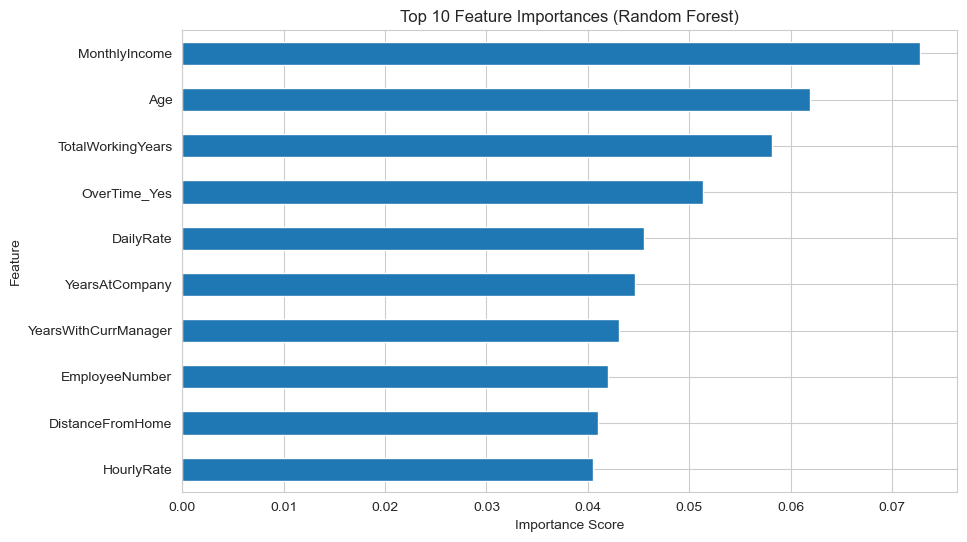


KEY DRIVERS OF ATTRITION


In [29]:
# Extract feature importances
# TODO: Get feature_importances_ from rf_model and create a pandas Series
# with feature names as index
feature_importances = pd.Series(rf_model.feature_importances_,index=X_cleaned.columns)

# TODO: Sort feature importances in descending order
feature_importances=feature_importances.sort_values(ascending=False)

# TODO: Get top 10 most important features
top_10_features =  feature_importances.head(10)
print(top_10_features)
# Visualize top 10 feature importances
# TODO: Create a horizontal bar plot of the top 10 features
# Use plt.barh() or top_10_features.plot(kind='barh')
plt.figure()
top_10_features.sort_values().plot(kind='barh')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

print("\n" + "="*80)
print("KEY DRIVERS OF ATTRITION")
print("="*80)

#### Key Drivers of Attrition
Write 3-5 bullet points explaining what the top factors reveal. Include at least one actionable takeaway for HR
- [My first insight is that monthly income plays a role in employee attrition and in fact is a significant role amongst the others]
- [Each feature is spread out amongst the importance scale. They are not all clumpes around the same importance levels]
- [Most people don't mind driving a certain distant to work, as the features importance score is lower on the scale]
- [I was surprised to see that hourly rate didn't have an impact on employee attrition especially with the knowledge of low wages]

### Step 6: Reflection (150-200 words)
----------------------------------------------------------------------------
Write a 150-200 word reflection addressing:
- How the random forest improved upon the decision tree baseline
- When ensemble methods are worth the added complexity
- How these modeling skills connect to your final project

[The random forest allowed the data to be less skewed by allowing multiple options within the decision tree. With more options, comes more possibilities allowing the data to be more reliable and useful. Also, overfitting wil be less likely, because the system will take an average of more data instead of memorizing it.Ensemble methods are worth the added complexity, because the systems can handle complex data better and give a more accurate outcome. In my final project i will be integrating multiple modeling techniques to address a real-world business challenge. The techniques I am using here,which are building and evaluating ensemble models, interpreting variable importance, and communicating insights, will form the backbone of my final project later in the course.]

### Step 7: Push to GitHub
----------------------------------------------------------------------------
Once complete, save and push your work:
1. Save this file
2. Run in terminal:
```sh
git add .
git commit -m 'completed employee attrition assignment'
git push
```